# Earthquake Forecast System

In [2]:
#   Add libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset

1911 - 2017 Earthquake Data

In [17]:
#   Read csv file(data) 
data = open(r"C:\Users\lenovo\jupyter\Earthquake_Prediction\randomDataset.csv")
data = pd.read_csv(data)

In [18]:
data.head()

,No,Tarih,Zaman,Enlem,Boylam,Der,ML,Yer
0,4525,2010.10.29,06:32:41.23,40.3212,25.8650,13.1,4.1,KALEKOY-GOKCEADA (Ã‡ANAKKALE) [North West 10.3 k
1,8941,2002.10.16,23:14:20.90,36.1300,28.3600,14.0,0.0,KDENIZ
2,1897,2014.07.30,00:55:04.68,38.0610,24.0573,15.6,3.5,YUNANISTAN
3,13179,1991.09.03,04:38:39.20,36.1800,31.8100,113.0,0.0,NTALYA KÃ–RFEZI (AKDENIZ)
4,21548,1969.03.23,21:11:02.50,37.9000,27.6000,5.0,0.0,DAGKARAAGAC-GERMENCIK (AYDIN) [South West 0.7 k


In [19]:
data['Latitude']=data['Enlem']
data['Longitude']=data['Boylam']
data['Depth']=data['Der']

In [20]:
data= data.drop('Enlem', axis=1)
data= data.drop('Boylam', axis=1)
data= data.drop('Der', axis=1)

In [21]:
data['Magnitude']=data['ML']
data['Degree'] = data['Magnitude']

In [22]:
data= data.drop('ML', axis=1)

In [23]:
data.head()

,No,Tarih,Zaman,Yer,Latitude,Longitude,Depth,Magnitude,Degree
0,4525,2010.10.29,06:32:41.23,KALEKOY-GOKCEADA (Ã‡ANAKKALE) [North West 10.3 k,40.3212,25.8650,13.1,4.1,4.1
1,8941,2002.10.16,23:14:20.90,KDENIZ,36.1300,28.3600,14.0,0.0,0.0
2,1897,2014.07.30,00:55:04.68,YUNANISTAN,38.0610,24.0573,15.6,3.5,3.5
3,13179,1991.09.03,04:38:39.20,NTALYA KÃ–RFEZI (AKDENIZ),36.1800,31.8100,113.0,0.0,0.0
4,21548,1969.03.23,21:11:02.50,DAGKARAAGAC-GERMENCIK (AYDIN) [South West 0.7 k,37.9000,27.6000,5.0,0.0,0.0


In [24]:
data['Tarih']=pd.to_datetime(data['Tarih'])

In [25]:
data.head()

,No,Tarih,Zaman,Yer,Latitude,Longitude,Depth,Magnitude,Degree
0,4525,2010-10-29,06:32:41.23,KALEKOY-GOKCEADA (Ã‡ANAKKALE) [North West 10.3 k,40.3212,25.8650,13.1,4.1,4.1
1,8941,2002-10-16,23:14:20.90,KDENIZ,36.1300,28.3600,14.0,0.0,0.0
2,1897,2014-07-30,00:55:04.68,YUNANISTAN,38.0610,24.0573,15.6,3.5,3.5
3,13179,1991-09-03,04:38:39.20,NTALYA KÃ–RFEZI (AKDENIZ),36.1800,31.8100,113.0,0.0,0.0
4,21548,1969-03-23,21:11:02.50,DAGKARAAGAC-GERMENCIK (AYDIN) [South West 0.7 k,37.9000,27.6000,5.0,0.0,0.0


In [26]:
data['Magnitude'].min()

0.0

In [27]:
# Delete rows which 'Magnitude < 0.49'
data.drop( data[ data['Magnitude']  < 0.49 ].index , inplace=True)

In [28]:
data['Magnitude'].min()

0.5

In [29]:
data['Magnitude'].max()

7.2

In [30]:
# Richter Scale and Class
r = [0.49, 3.5, 4.3, 5.3, 6.5, 7.5]
g = ['Small','Moderate','Medium','Great','Super']

data['Degree'] = pd.cut(data['Degree'], bins=r, labels=g)

In [31]:
data['Degree'].value_counts()

Moderate    4515
Small       3749
Medium      2801
Great        309
Super         24
Name: Degree, dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11398 entries, 0 to 24002
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   No         11398 non-null  int64         
 1   Tarih      11398 non-null  datetime64[ns]
 2   Zaman      11398 non-null  object        
 3   Yer        11398 non-null  object        
 4   Latitude   11398 non-null  float64       
 5   Longitude  11398 non-null  float64       
 6   Depth      11398 non-null  float64       
 7   Magnitude  11398 non-null  float64       
 8   Degree     11398 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 812.7+ KB


In [33]:
data['Magnitude'].groupby(data['Degree']).mean()

Degree
Small       1.555695
Moderate    3.891561
Medium      4.756587
Great       5.714887
Super       6.745833
Name: Magnitude, dtype: float64

In [34]:
# Reset the index range and add new range
data.reset_index(inplace=True)
data.index = pd.RangeIndex(start=0, stop=11398 , step=1)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      11398 non-null  int64         
 1   No         11398 non-null  int64         
 2   Tarih      11398 non-null  datetime64[ns]
 3   Zaman      11398 non-null  object        
 4   Yer        11398 non-null  object        
 5   Latitude   11398 non-null  float64       
 6   Longitude  11398 non-null  float64       
 7   Depth      11398 non-null  float64       
 8   Magnitude  11398 non-null  float64       
 9   Degree     11398 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 812.9+ KB


## Create Training and Test Sets

In [36]:
# Seperate dataset as training and test %30 - % 70
train= data.iloc[:7979, :]
test= data.iloc[7979:11398 ,:]
test_test=test.copy()

In [37]:
train.head()

,index,No,Tarih,Zaman,Yer,Latitude,Longitude,Depth,Magnitude,Degree
0,0,4525,2010-10-29,06:32:41.23,KALEKOY-GOKCEADA (Ã‡ANAKKALE) [North West 10.3 k,40.3212,25.8650,13.1,4.1,Moderate
1,2,1897,2014-07-30,00:55:04.68,YUNANISTAN,38.0610,24.0573,15.6,3.5,Small
2,6,2220,2014-01-14,16:14:42.43,GUNLUCE-ODEMIS (IZMIR) [North West 1.0 km],38.2778,27.9448,9.8,3.6,Moderate
3,10,470,2017-02-15,07:36:42.23,AKDENIZ,36.3077,26.7273,130.5,3.5,Small
4,11,2777,2013-01-26,18:23:41.36,CITOREN- (VAN) [North West 3.1 km],38.6090,43.1857,3.1,3.5,Small


In [38]:
test.head()

,index,No,Tarih,Zaman,Yer,Latitude,Longitude,Depth,Magnitude,Degree
7979,16633,6225,2007-10-21,11:15:24.77,KALEKOY-GOKCEADA (Ã‡ANAKKALE) [North 16.6 km],40.3793,25.8718,5.5,3.7,Moderate
7980,16634,6737,2006-10-24,03:39:35.10,AKDENIZ,34.9900,27.0100,69.0,4.7,Medium
7981,16638,21550,1969-03-23,03:50:58.00,GOLCUK-SINDIRGI (BALIKESIR) [South East 2.1 km],39.3000,28.0000,10.0,4.3,Moderate
7982,16640,23910,1916-09-27,15:02:01.30,YUNANISTAN,38.8000,23.0000,6.0,5.5,Great
7983,16643,1410,2015-06-27,05:47:55.89,YAYLA-KOYCEGIZ (MUGLA) [ 4.73 km],37.0743,28.7652,5.0,3.7,Moderate


In [39]:
test['Magnitude'].groupby(test['Degree']).size()

Degree
Small       1118
Moderate    1370
Medium       839
Great         87
Super          5
Name: Magnitude, dtype: int64

In [40]:
train['Magnitude'].groupby(train['Degree']).size()

Degree
Small       2631
Moderate    3145
Medium      1962
Great        222
Super         19
Name: Magnitude, dtype: int64

In [41]:
train.shape, test.shape

((7979, 10), (3419, 10))

## Clear unnecessary tags from our dataset

In [42]:
train.drop('index', axis=1, inplace=True)
test.drop('index', axis=1, inplace=True)
test_test.drop('index', axis=1, inplace=True)

train.drop('No', axis=1, inplace=True)
test.drop('No', axis=1, inplace=True)
test_test.drop('No', axis=1, inplace=True)

train.drop('Tarih', axis=1, inplace=True)
test.drop('Tarih', axis=1, inplace=True)
test_test.drop('Tarih', axis=1, inplace=True)

train.drop('Zaman', axis=1, inplace=True)
test.drop('Zaman', axis=1, inplace=True)
test_test.drop('Zaman', axis=1, inplace=True)

train.drop('Yer', axis=1, inplace=True)
test.drop('Yer', axis=1, inplace=True)
test_test.drop('Yer', axis=1, inplace=True)

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
#   Clear Derece column in test set
test.drop('Degree', axis=1, inplace=True)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7979 entries, 0 to 7978
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Latitude   7979 non-null   float64 
 1   Longitude  7979 non-null   float64 
 2   Depth      7979 non-null   float64 
 3   Magnitude  7979 non-null   float64 
 4   Degree     7979 non-null   category
dtypes: category(1), float64(4)
memory usage: 257.5 KB


In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3419 entries, 7979 to 11397
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   3419 non-null   float64
 1   Longitude  3419 non-null   float64
 2   Depth      3419 non-null   float64
 3   Magnitude  3419 non-null   float64
dtypes: float64(4)
memory usage: 107.0 KB


In [46]:
test_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3419 entries, 7979 to 11397
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Latitude   3419 non-null   float64 
 1   Longitude  3419 non-null   float64 
 2   Depth      3419 non-null   float64 
 3   Magnitude  3419 non-null   float64 
 4   Degree     3419 non-null   category
dtypes: category(1), float64(4)
memory usage: 110.5 KB


In [47]:
# Reset the index range and add new range
test.reset_index(inplace=True)
test.index = pd.RangeIndex(start=0, stop=3419  , step=1)

In [48]:
# Reset the index range and add new range
test_test.reset_index(inplace=True)
test_test.index = pd.RangeIndex(start=0, stop=3419  , step=1)

In [49]:
test.drop('index', axis=1, inplace=True)
test_test.drop('index', axis=1, inplace=True)

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3419 entries, 0 to 3418
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   3419 non-null   float64
 1   Longitude  3419 non-null   float64
 2   Depth      3419 non-null   float64
 3   Magnitude  3419 non-null   float64
dtypes: float64(4)
memory usage: 107.0 KB


In [51]:
test_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3419 entries, 0 to 3418
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Latitude   3419 non-null   float64 
 1   Longitude  3419 non-null   float64 
 2   Depth      3419 non-null   float64 
 3   Magnitude  3419 non-null   float64 
 4   Degree     3419 non-null   category
dtypes: category(1), float64(4)
memory usage: 110.5 KB


## VISUALIZATION

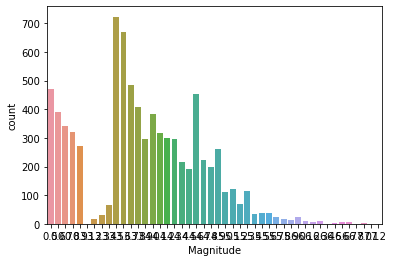

In [52]:
sns.countplot(train['Magnitude'])

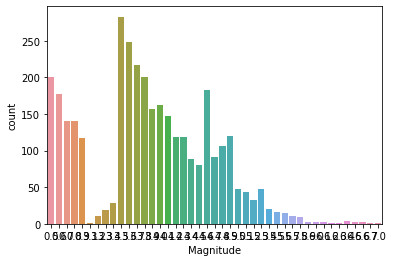

In [53]:
sns.countplot(test['Magnitude'])

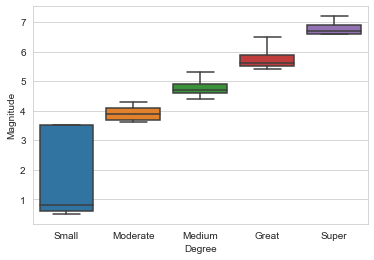

In [54]:
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'Degree', y = 'Magnitude', data = train)

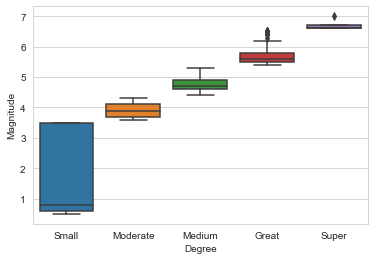

In [55]:
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'Degree', y = 'Magnitude', data = test_test)

In [56]:
train['Magnitude'].groupby(train['Degree']).size()

Degree
Small       2631
Moderate    3145
Medium      1962
Great        222
Super         19
Name: Magnitude, dtype: int64

In [57]:
test_test['Magnitude'].groupby(test_test['Degree']).size()

Degree
Small       1118
Moderate    1370
Medium       839
Great         87
Super          5
Name: Magnitude, dtype: int64

In [58]:
def bar_chart(feature):
    Small = train[train['Degree'] == 'Small'][feature].value_counts()
    Moderate = train[train['Degree'] == 'Moderate'][feature].value_counts()
    Medium = train[train['Degree'] == 'Medium'][feature].value_counts()
    Great = train[train['Degree'] == 'Great'][feature].value_counts()
    Super = train[train['Degree'] == 'Super'][feature].value_counts()
    
    df = pd.DataFrame([Small,Moderate,Medium, Great, Super])
    df.index = ['Small','Moderate','Medium', 'Great', 'Super']
    df.plot(kind='bar', stacked=True, figsize=(10,10))

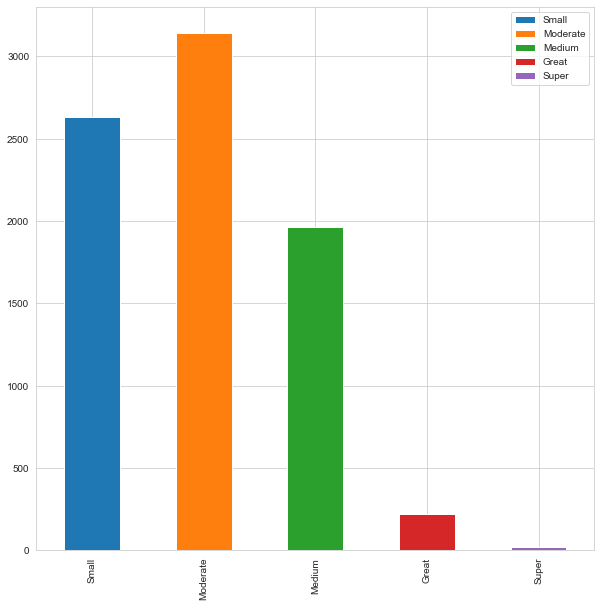

In [59]:
bar_chart('Degree')

In [61]:
def bar_chart(feature):
    Small = test_test[test_test['Degree'] == 'Small'][feature].value_counts()
    Moderate = test_test[test_test['Degree'] == 'Moderate'][feature].value_counts()
    Medium = test_test[test_test['Degree'] == 'Medium'][feature].value_counts()
    Great = test_test[test_test['Degree'] == 'Great'][feature].value_counts()
    Super = test_test[test_test['Degree'] == 'Super'][feature].value_counts()
    
    df = pd.DataFrame([Small,Moderate,Medium, Great, Super])
    df.index = ['Small','Moderate','Medium', 'Great', 'Super']
    df.plot(kind='bar', stacked=True, figsize=(10,10))

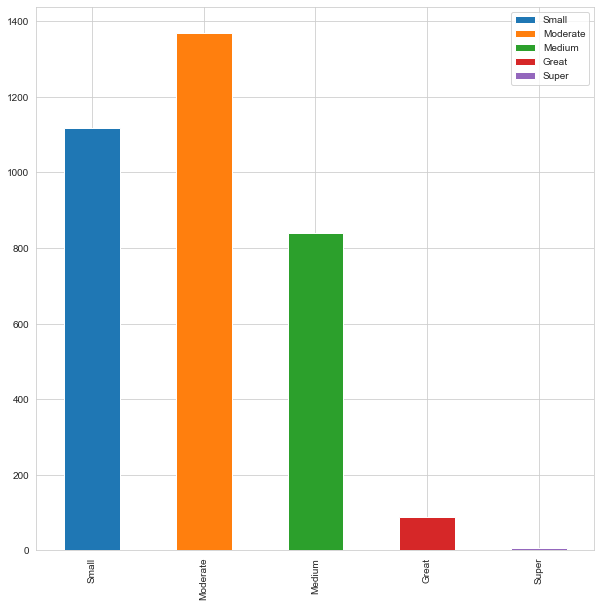

In [62]:
bar_chart('Degree')

(0, 8)

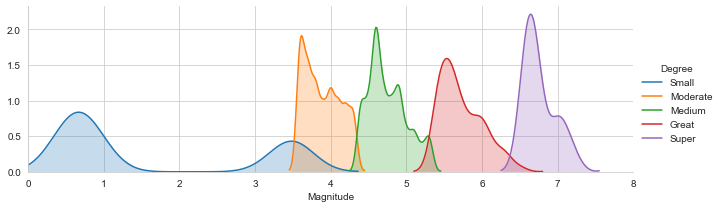

In [63]:
facet = sns.FacetGrid(train,hue="Degree",aspect=3)
facet.map(sns.kdeplot,'Magnitude',shade=True)
facet.add_legend()

plt.xlim(0 ,8)

(0, 8)

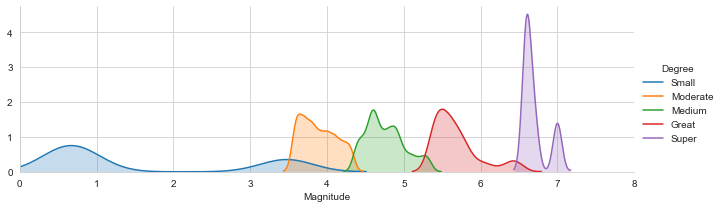

In [64]:
facet = sns.FacetGrid(test_test,hue="Degree",aspect=3)
facet.map(sns.kdeplot,'Magnitude',shade=True)
facet.add_legend()

plt.xlim(0 ,8)

## MODELLING 

In [65]:
# Creating feature matrix and target vector
train_data = train.drop('Degree', axis=1)
target = train['Degree'] #target has training data's degrees
train_data.shape, target.shape

((7979, 4), (7979,))

In [66]:
train_data.head()

,Latitude,Longitude,Depth,Magnitude
0,40.3212,25.8650,13.1,4.1
1,38.0610,24.0573,15.6,3.5
2,38.2778,27.9448,9.8,3.6
3,36.3077,26.7273,130.5,3.5
4,38.6090,43.1857,3.1,3.5


In [67]:
target.head()

0    Moderate
1       Small
2    Moderate
3       Small
4       Small
Name: Degree, dtype: category
Categories (5, object): [Small < Moderate < Medium < Great < Super]

In [68]:
train.drop('Magnitude', axis=1, inplace=True) # latitude, longitude, depth, degree
test.drop('Magnitude', axis=1, inplace=True) # has only latitude, longitude and depth
train_data.drop('Magnitude', axis=1, inplace=True) # has only latitude, longitude and depth

#test_test.drop('Magnitude', axis=1, inplace=True) #daha sonra yazdıracağım için kalacak

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [69]:
train.head()

,Latitude,Longitude,Depth,Degree
0,40.3212,25.8650,13.1,Moderate
1,38.0610,24.0573,15.6,Small
2,38.2778,27.9448,9.8,Moderate
3,36.3077,26.7273,130.5,Small
4,38.6090,43.1857,3.1,Small


In [70]:
test.head()

,Latitude,Longitude,Depth
0,40.3793,25.8718,5.5
1,34.9900,27.0100,69.0
2,39.3000,28.0000,10.0
3,38.8000,23.0000,6.0
4,37.0743,28.7652,5.0


In [71]:
train_data.head()

,Latitude,Longitude,Depth
0,40.3212,25.8650,13.1
1,38.0610,24.0573,15.6
2,38.2778,27.9448,9.8
3,36.3077,26.7273,130.5
4,38.6090,43.1857,3.1


In [72]:
test_test.head()

,Latitude,Longitude,Depth,Magnitude,Degree
0,40.3793,25.8718,5.5,3.7,Moderate
1,34.9900,27.0100,69.0,4.7,Medium
2,39.3000,28.0000,10.0,4.3,Moderate
3,38.8000,23.0000,6.0,5.5,Great
4,37.0743,28.7652,5.0,3.7,Moderate


## RANDOM FOREST 

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=360,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train_data, target)
print("Score: %.4f" % rf.oob_score_)

Score: 0.5948


In [74]:
# Prediction
predictions = rf.predict(test)
predictions = pd.DataFrame(predictions, columns=['Predicted Degree'])
# Derece - Degree
predictions = pd.concat((test_test.iloc[:, 4], predictions), axis = 1)
predictions = pd.concat((test_test.iloc[:, 3], predictions), axis = 1)

predictions.to_csv('result.csv', sep="-", index = False)

In [76]:
predictionResult = pd.read_csv(r"C:\Users\lenovo\jupyter\Earthquake_Prediction\result.csv")

In [77]:
predictionResult.head()

,Magnitude-Degree-Predicted Degree
0,3.7-Moderate-Moderate
1,4.7-Medium-Medium
2,4.3-Moderate-Moderate
3,5.5-Great-Medium
4,3.7-Moderate-Moderate


## Performance Metrics for Classification 

###### Confusion Matrix

In [78]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_test.iloc[:, 4], rf.predict(test))


#  Derece
# Small       1118
# Moderate    1370
# Medium       839
# Great         87
# Super          5

# Great, Medium, Modarate, Small, Super

array([[  4,  48,  20,  14,   1],
       [  9, 478, 239, 112,   1],
       [  4, 192, 942, 232,   0],
       [  1,  73, 378, 665,   1],
       [  0,   4,   1,   0,   0]], dtype=int64)

In [79]:
y_actu = pd.Series(test_test.iloc[:, 4], name='Actual')
y_pred = pd.Series( rf.predict(test), name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)

In [80]:
df_confusion = pd.crosstab(y_actu,y_pred ,rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,Great,Medium,Moderate,Small,Super,All
Actual,,,,,,
Small,1,73,378,665,1,1118
Moderate,4,192,942,232,0,1370
Medium,9,478,239,112,1,839
Great,4,48,20,14,1,87
Super,0,4,1,0,0,5
All,18,795,1580,1023,3,3419


In [81]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix',  cmap=None, normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.show()

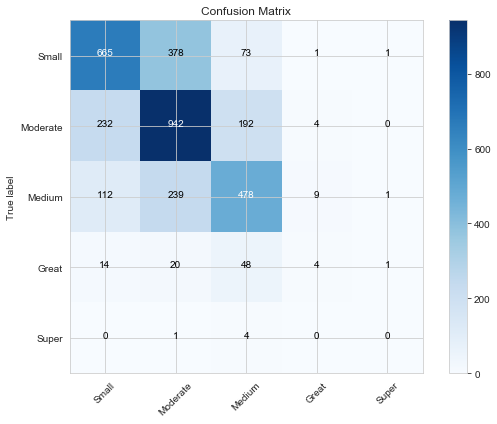

In [82]:
plot_confusion_matrix(cm           =  np.array([[   665,    378,   73,  1,    1],
                                                 [   232,   942,  192,  4,    0],
                                                 [   112,   239, 478, 9,    1],
                                                 [   14,    20,  48,  4,    1],
                                                [   0,    1,    4,   0,    0]]),
                      
                      normalize    = False,
                      target_names = ['Small', 'Moderate','Medium','Great','Super'],
                      title        = "Confusion Matrix")

# Great, Medium, Modarate, Small, Super

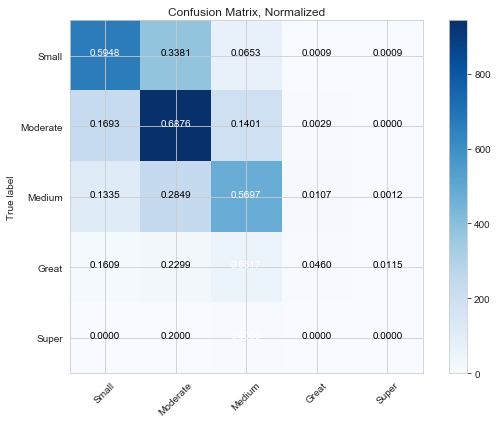

In [83]:
plot_confusion_matrix(cm            =  np.array([[   665,    378,   73,  1,    1],
                                                 [   232,   942,  192,  4,    0],
                                                 [   112,   239, 478, 9,    1],
                                                 [   14,    20,  48,  4,    1],
                                                [   0,    1,    4,   0,    0]]),
                      normalize    = True,
                      target_names = ['Small', 'Moderate','Medium','Great','Super'],
                      title        = "Confusion Matrix, Normalized")

###### Accuracy

In [84]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_test.iloc[:, 4], rf.predict(test))
print('Accuracy: %f' % accuracy)

Accuracy: 0.610997


###### Recall

In [85]:
from sklearn.metrics import recall_score

# r: tp / (tp + fn)
recall=recall_score(test_test.iloc[:, 4], rf.predict(test), pos_label='positive', average='micro')
print('Recall: %f' % recall)

Recall: 0.610997


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


###### Precision

In [86]:
from sklearn.metrics import precision_score

# p: tp / (tp + fp)
precision=precision_score(test_test.iloc[:, 4], rf.predict(test),pos_label='positive', average='micro')
print('Precision: %f' % precision)

Precision: 0.610997


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


###### F1 score

In [87]:
from sklearn.metrics import f1_score

# f1: 2 tp / (2 tp + fp + fn)
# f1: 2*(p*r) / p+r
f1 = f1_score(test_test.iloc[:, 4], rf.predict(test),pos_label='positive', average='micro')
print('F1 score: %f' % f1)

F1 score: 0.610997


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
